# AGN Selection Through Artificial Intelligence¶

This notebook performs AGN Selection through DELVE data via an Autoencoder. The frameworks used for this deep learning model are TensorFlow and Pytorch.


## Authors

* Ash Karale
    

## Contents:

* [I. Introduction](#one)
* [II. MNIST Experiment](#two)
* [IIa. MNIST AGN Experiment](#three)
* [III. DELVE Experiment](#four)
* [IIIa. Data Acquisition](#five)
* [IIIb. Data Processing](#six)
* [IV. Autoencoder Experiments](#seven)
* [IVa. Model Definition](#eight)
* [IVb. Model Visualization](#nine)
* [IVc. Model Training](#ten)
* [IVd. Model Output](#eleven)
* [V. Transfer Learning](#twelve)

## Versions:

Initial Version: December 2023 (Ash Karale)

Latest Version: December 2023 (Ash Karale)



## I. Introduction <a class="anchor" id="one"></a>

With the upcoming Legacy Survey of Space and Time potentially identifying 40 billion celestial objects, our goal is to pinpoint the 100 million that are AGNs - a classic "needle-in-a- haystack" problem that requires sophisticated machine learning techniques to handle. We explore the use of autoencoders for AGN selection from data akin to the anticipated LSST survey. 

The data is gathered from the AGN Data Challenge which comprises of two primary sources known as the Sloan Digital Sky Survey Stripe 82, and the XMM-Large Scale Structure area. Furthermore, we explore the comparative effectiveness of TensorFlow and PyTorch in constructing autoencoders, providing an interface between computer science and astronomy.

### Visual Demonstration

Our primary goal is to gain a solid understanding of neural networks and a specialized type of them- autoencoders, so we can use them to do AGN science.

Neural networks are a cornerstone of artificial intelligence and machine learning. They draw inspiration from the human brain, using interconnected nodes or "neurons" to process information and make decisions. A neural network takes in inputs, which are processed in hidden layers using weights that are adjusted during training. The model then outputs a prediction. The weights are adjusted to find patterns in order to map inputs to outputs.


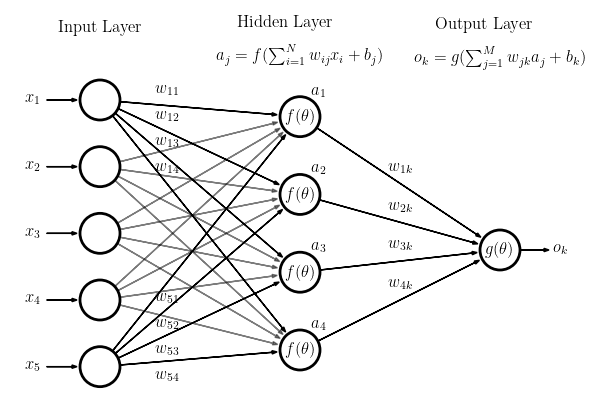

In [3]:
html_str_1 = f'<img src="data:image/png;base64,{image_base64_1}"/>'
display(HTML(html_str_1))

One particular type of neural network that we will delve deeper into is an autoencoder. Autoencoders are unsupervised learning models that are used for data compression, noise reduction, and feature extraction. They have an interesting architecture, consisting of an encoder that compresses the input data and a decoder that attempts to reconstruct the original input</font> from the compressed data.


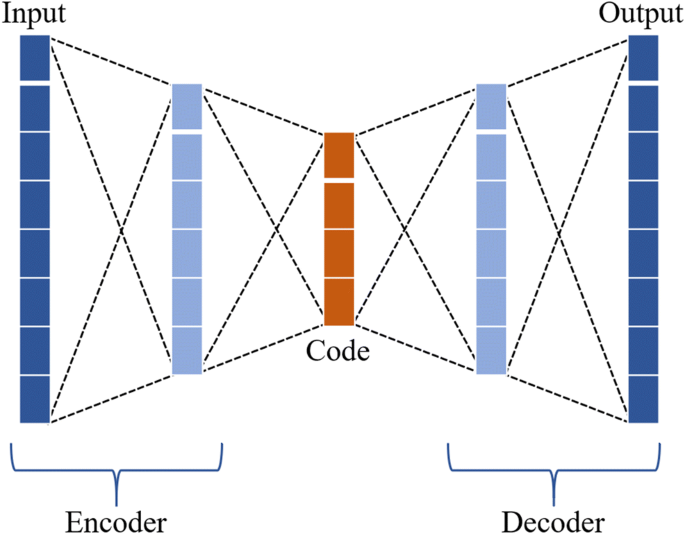

In [4]:
html_str_2 = f'<img src="data:image/png;base64,{image_base64_2}"/>'
display(HTML(html_str_2))

We will be implementing a simple autoencoder using the popular deep learning library, Keras, and the well-known MNIST dataset.

## II. MNIST Experiment <a class="anchor" id="two"></a>

We will use the famous MNIST dataset for the purpose of demonstration. Note that this dataset is used because of its simplicity and ready availability, though the concepts can be applied to more complex datasets, including those related to active galaxies in astronomy.

In Python, we use the Keras API which works on top of TensorFlow to implement our autoencoder:

The MNIST dataset contains 60,000 training images and 10,000 test images, each 28x28 pixels in size. By reshaping the data and normalizing pixel values to a [0,1] range, we prepare our input for the autoencoder. Although TensorFlow provides a flatten method, using reshape is a straightforward approach to convert the 2D image matrices into 1D vectors required for our dense neural network layers.

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

We choose an encoding dimension of 32 to compress the input; this is a balance between retaining enough information and achieving meaningful compression. ReLU is selected for the encoder to introduce non-linearity, helping the model learn complex patterns without the vanishing gradient problem. For the decoder, we use a sigmoid activation because we want the output values to be in the range [0,1], the same as our input data.
The addition of a 128-node hidden layer before and after the encoding layer introduces additional levels of abstraction, allowing the network to learn more complex representations. This also enhances the "funneling" effect, where data is compressed down to a lower-dimensional latent space and then expanded back to its original dimension. This structure encourages the autoencoder to learn a more robust representation of the input data.

In [51]:
# The encoding dimension is a hyperparameter that defines the size of the compressed representation
encoding_dim = 32  

# input placeholder
input_img = Input(shape=(784,))

# Adding a hidden layer before the bottleneck
hidden_layer = Dense(128, activation='relu')(input_img)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding a hidden layer after the bottleneck
hidden_layer_decoded = Dense(128, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

The adam optimizer is used for its adaptive learning rate capabilities, which help converge to the optimal set of weights more efficiently. We employ binary cross-entropy as the loss function, which is suited for a reconstruction task where the output is a probability in the range [0,1], representing the likelihood of each pixel being active (or white in this case).

In [52]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

The choice of 50 epochs is to give the model sufficient time to learn, as autoencoders typically require more epochs for training due to their complexity. A batch size of 256 is large enough for efficient processing and small enough to maintain a noisy gradient descent, which often helps in finding global minima. Shuffling the data ensures that each batch is different, which helps in preventing overfitting and makes the model more robust.

In [53]:
# Train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50


2023-11-08 15:16:54.646530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1

229/235 [============================>.] - ETA: 0s - loss: 0.2794

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - ETA: 0s - loss: 0.2774

2023-11-08 15:16:58.859250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1

235/235 [==============================] - 6s 17ms/step - loss: 0.2774 - val_loss: 0.1904
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1712 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1446 - val_loss: 0.1338
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1285 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1182 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1108 - val_loss: 0.1066
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1054 - val_loss: 0.1021
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1016 - val_loss: 0.0988
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/50
235/235 [==============================] - 2s 6ms/step - loss: 0.0972 - val_loss: 0.0953
Epoch 11/

The predict function applies the trained autoencoder to the test data, encoding and then decoding it to produce a reconstruction. This serves as a test to see how well the autoencoder can generalize to new, unseen data, given that it has learned a compact representation of the training data.

In [54]:
# Use the trained autoencoder to make predictions on the test data
# Here, we use the trained autoencoder to predict the test images. We input the flattened image arrays
# and the model outputs the reconstructed images. This is a process of encoding the original
# high-dimensional data into a lower-dimensional form and then decoding it back into the original space,
# inevitably losing some information but trying to minimize this loss.
decoded_imgs = autoencoder.predict(x_test)

  1/313 [..............................] - ETA: 54s

2023-11-08 15:18:14.874742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


Finally, we visualize 10 examples to qualitatively evaluate the autoencoder's performance. It's important to remember that the MNIST test dataset contains 10,000 images. Here, we're only sampling a small subset for visualization to check if the autoencoder is reconstructing digits that visually resemble the originals, despite the dimensionality reduction and subsequent information loss.

This gives us a solid foundation to start understanding how neural networks and autoencoders function. We can apply this same basic concept to selecting AGNs from the AGN DC Dataset.

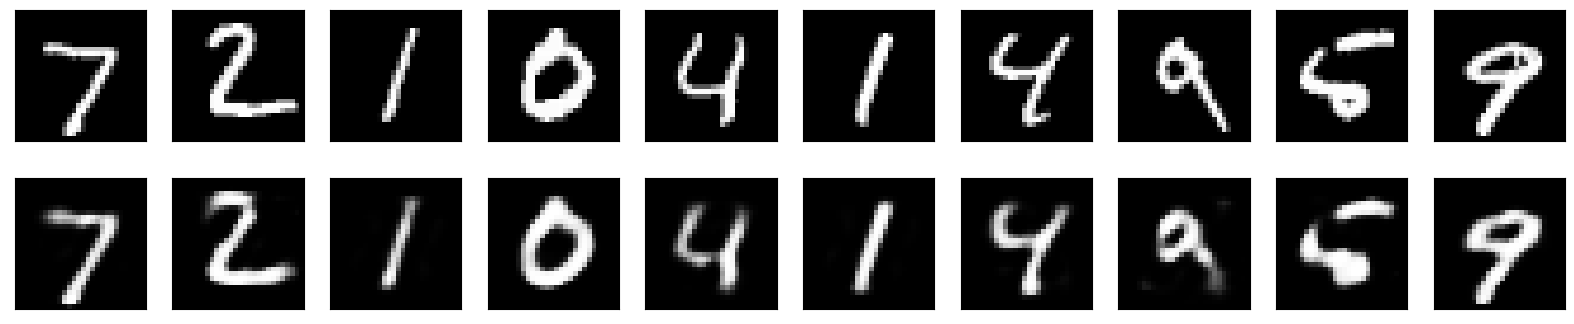

In [55]:
# Use Matplotlib to visualize the reconstructed inputs
import matplotlib.pyplot as plt

# The test dataset contains 10,000 images, but we'll only visualize a subset of 10 to see
# the reconstruction quality. This provides a quick check to ensure that our autoencoder is
# learning to compress and reconstruct the images effectively.
n = 10  # Number of digits to display as a sample from the test set

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    # The subplot below will display the reconstructed image that corresponds to the original image above.
    # It is reshaped back to 28x28 pixels from the flattened output of the autoencoder.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application to AGN DC Dataset: Understanding and Implementing Autoencoders

To understand how the process of using an autoencoder relates to our dataset—the AGN DC, which is the Sloan Digital Sky Survey (SDSS) Stripe 82, and the XMM-Large Scale Structure (XMM-LSS)—we need to consider the nature of the data and the benefits of the autoencoder model.

Our astronomical data sources provide us with a high-dimensional dataset. Each data point (e.g., an observed galaxy, star, or AGN) might come with several associated attributes such as its light curve features, astrometry, photometry, color, morphology, etc.

In this high-dimensional space, meaningful patterns or structures may not be immediately evident. Furthermore, as the data from these sources might not fully represent the diversity of astronomical objects that LSST will observe, direct application of supervised learning might lead to biased or incomplete models.

This is where autoencoders come into play. Autoencoders are a type of neural network that can learn to compress data into a lower-dimensional representation. In the encoding stage, the autoencoder learns to capture the most salient features of the data, effectively reducing its dimensionality. This process can help reveal underlying structure in the data that might be difficult to discern in the original high-dimensional space.

In the decoding stage, the autoencoder learns to reconstruct the original data from the compressed representation. By comparing the original data with the reconstructed data (as we do visually in the code block), we can get a sense of how well the autoencoder has learned to capture the essential features of the data.

The encoded representation, or the "latent space", holds a compressed form of the data that ideally captures its most important features. This latent space can then be used as input to a supervised classification algorithm, which can be more manageable and more effective than working with the original high-dimensional data.

So, in our case, the autoencoder serves two purposes:

i. It helps us explore and understand the structure of our high-dimensional astronomical data.

ii. It provides a form of unsupervised pre-training that can compensate for the underrepresentation in our training data. The autoencoder learns general features from the entire dataset, and this learning can then be fine-tuned with our specific but limited labeled data.

Thus, our visual comparison of original and autoencoder-reconstructed images (or data points) in the code block serves as an intuitive performance check for our model, indicating how well the autoencoder can capture the essential features of our complex astronomical dataset.

## IIa. MNIST AGN Experiment <a class="anchor" id="three"></a>

In the context of astronomy, each observation (or astronomical object) can be likened to an individual digit in the MNIST dataset, and each feature of this observation can be thought of as a pixel. However, unlike pixels in an image that combine to form a visual pattern, features in astronomical data do not inherently create a visual image but rather comprise a multi-dimensional feature space. Most astronomical data is non-image data, where each feature represents a different characteristic of the observation, such as luminosity, color index, or spectral line properties.

Given this, we will use the MNIST dataset as a stand-in for our astronomical data to demonstrate the process before applying it to actual astronomical datasets. In this educational example, we categorize '3s', '5s', and '7s' from MNIST as our three classes analogous to stars, quasars, and galaxies, respectively.

Our objective with the autoencoder isn't to reconstruct images but to learn a reduced representation of the data that can help in classifying these astronomical objects into one of the three categories. It's important to note that while an autoencoder is typically used for dimensionality reduction or feature learning, in a real-world scenario, we would likely use a classification algorithm directly, possibly leveraging the features learned by an autoencoder.

Here is how we might structure our experimental approach:

Generate Synthetic Astronomical Data:
Instead of image data, create a dataset where each entry represents an astronomical object with features corresponding to different observations.
Normalize this data so that each feature has a similar range, important for training neural networks effectively.

1. Define the Autoencoder:
Use the same architecture as before but ensure it is suitable for the dimensionality of our synthetic data.
Keep in mind that we may need to adjust the size and number of layers depending on the complexity and size of the actual data.

2. Training:
Train the autoencoder on this synthetic dataset to learn the essential features.
While training on MNIST, we are implicitly assuming that each class ('3', '5', '7') is sufficiently distinct in its feature space, analogous to stars, quasars, and galaxies.

3. Reconstruction and Visualization:
After training, we use the autoencoder to reconstruct the data points for each class.
We then visualize the original and reconstructed data using histograms or similar statistical tools to assess the performance. The x-axis of these histograms would represent the feature values, and the y-axis would represent their frequency or distribution.

4. Multiclass Classification:
Ultimately, the goal is to label each astronomical object with its respective class and provide probabilities for each class.
This step might require additional classification layers or algorithms beyond the autoencoder.

By first working with the MNIST dataset, we can understand the autoencoder's mechanics in a controlled environment before moving to real astronomical data, which may be more complex and less structured.

In [56]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from keras.datasets import mnist

# Assume we have three classes and create a list of class names
class_names = ['star', 'quasar', 'galaxy']

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtering MNIST data to only use 3s, 5s, and 7s to represent stars, quasars, and galaxies respectively. 
# Each image is flattened from a 28x28 matrix to a 784-element vector and then normalized so each pixel value is between 0 and 1.
star_data = x_train[y_train == 3].reshape(-1, 784).astype('float32') / 255
quasar_data = x_train[y_train == 5].reshape(-1, 784).astype('float32') / 255
galaxy_data = x_train[y_train == 7].reshape(-1, 784).astype('float32') / 255

# Concatenate all data into a single array
# Combining star, quasar, and galaxy data into one dataset to simulate a mixed, unlabeled astronomical dataset.
all_data = np.concatenate([star_data, quasar_data, galaxy_data])

# Normalizing the data by a MinMaxScaler and fit the scaler to the data and transform it
# Normalizing the concatenated data, though real astronomical data may require different preprocessing.
scaler = MinMaxScaler()
all_data = scaler.fit_transform(all_data)

# Apply PCA for dimensionality reduction
# Reducing dimensionality to 10 principal components for simplifying visualization and interpretation.
pca = PCA(n_components=10)
all_data_reduced = pca.fit_transform(all_data)

# Define autoencoder architecture
# Define input layer, adjust the input dimension to match the PCA-reduced data
input_layer = Input(shape=(all_data_reduced.shape[1],))
# Define the encoding layers with linear activation
encoded = Dense(128, activation='linear')(input_layer)
encoded = Dense(64, activation='linear')(encoded)
encoded = Dense(32, activation='linear')(encoded)

# Define the decoding layers with linear activation
decoded = Dense(64, activation='linear')(encoded)
decoded = Dense(128, activation='linear')(decoded)
decoded = Dense(all_data_reduced.shape[1], activation='linear')(decoded)  # Match output dimension to input

# Instantiate and compile the autoencoder model
# Using linear activation functions and MSE loss as this is a simple example focusing on reconstructing input values.
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the model to the PCA-reduced data
autoencoder.fit(all_data_reduced, all_data_reduced,
                epochs=200,
                batch_size=256,
                shuffle=True)

# Generate reconstructions of the input data
decoded_data = autoencoder.predict(all_data_reduced)

# Following the reconstruction, we would compare the original and decoded datasets to evaluate the autoencoder's performance.

Epoch 1/200


2023-11-08 15:18:22.408088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 3s 18ms/step - loss: 0.2520
Epoch 2/200
70/70 [==============================] - 0s 6ms/step - loss: 1.0967e-04
Epoch 3/200
70/70 [==============================] - 0s 7ms/step - loss: 1.0543e-07
Epoch 4/200
70/70 [==============================] - 0s 6ms/step - loss: 9.5465e-11
Epoch 5/200
70/70 [==============================] - 0s 7ms/step - loss: 1.6386e-13
Epoch 6/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1636e-13
Epoch 7/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1593e-13
Epoch 8/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1662e-13
Epoch 9/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1735e-13
Epoch 10/200
70/70 [==============================] - 0s 6ms/step - loss: 1.1703e-13
Epoch 11/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1709e-13
Epoch 12/200
70/70 [==============================] - 0s 7ms/step - loss: 1.1768e-13
Epoc

70/70 [==============================] - 0s 6ms/step - loss: 6.3703e-05
Epoch 193/200
70/70 [==============================] - 0s 6ms/step - loss: 1.2175e-04
Epoch 194/200
70/70 [==============================] - 0s 6ms/step - loss: 9.0753e-05
Epoch 195/200
70/70 [==============================] - 0s 7ms/step - loss: 4.4926e-05
Epoch 196/200
70/70 [==============================] - 0s 6ms/step - loss: 4.3256e-05
Epoch 197/200
70/70 [==============================] - 0s 6ms/step - loss: 5.4062e-05
Epoch 198/200
70/70 [==============================] - 0s 6ms/step - loss: 1.4077e-04
Epoch 199/200
70/70 [==============================] - 0s 7ms/step - loss: 3.7818e-04
Epoch 200/200
70/70 [==============================] - 0s 7ms/step - loss: 8.2064e-05


2023-11-08 15:19:56.128107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


557/557 [==============================] - 2s 2ms/step


In the following cells, we will visualize the reconstruction quality of the autoencoder. We start by examining the first principal component for its distinctiveness across our classes.

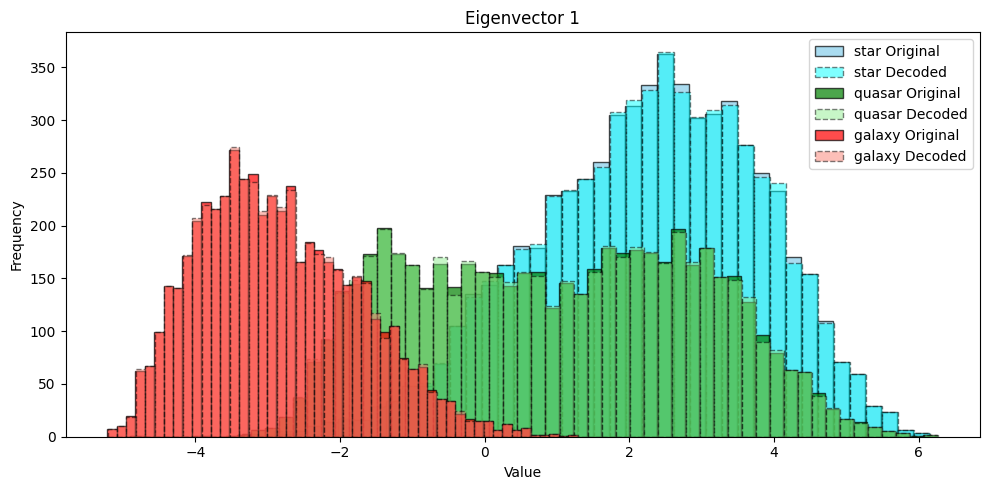

In [57]:
import matplotlib.pyplot as plt

# First, plot for Eigenvector 1 to assess its distinctiveness across classes
fig, ax = plt.subplots(figsize=(10, 5))  # Single plot for eigenvector 1
eigenvector_index = 0  # Index for the first eigenvector

# Loop over each class for eigenvector 1
for j, class_name in enumerate(class_names):
    # Extract original and decoded data for the first eigenvector for current class
    original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
    decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
    
    # Plot original data for eigenvector 1
    ax.hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
    
    # Plot decoded data for eigenvector 1
    ax.hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

# Set title and labels, and add a legend for eigenvector 1
ax.set_title(f'Eigenvector {eigenvector_index+1}')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.legend()

# Show the plot for eigenvector 1
plt.tight_layout()
plt.show()

Next, we will examine selected eigenvectors (2, 5, 8, and 9) where one class is expected to separate well from the others. Following this, we will look at the remaining eigenvectors to analyze class overlap.

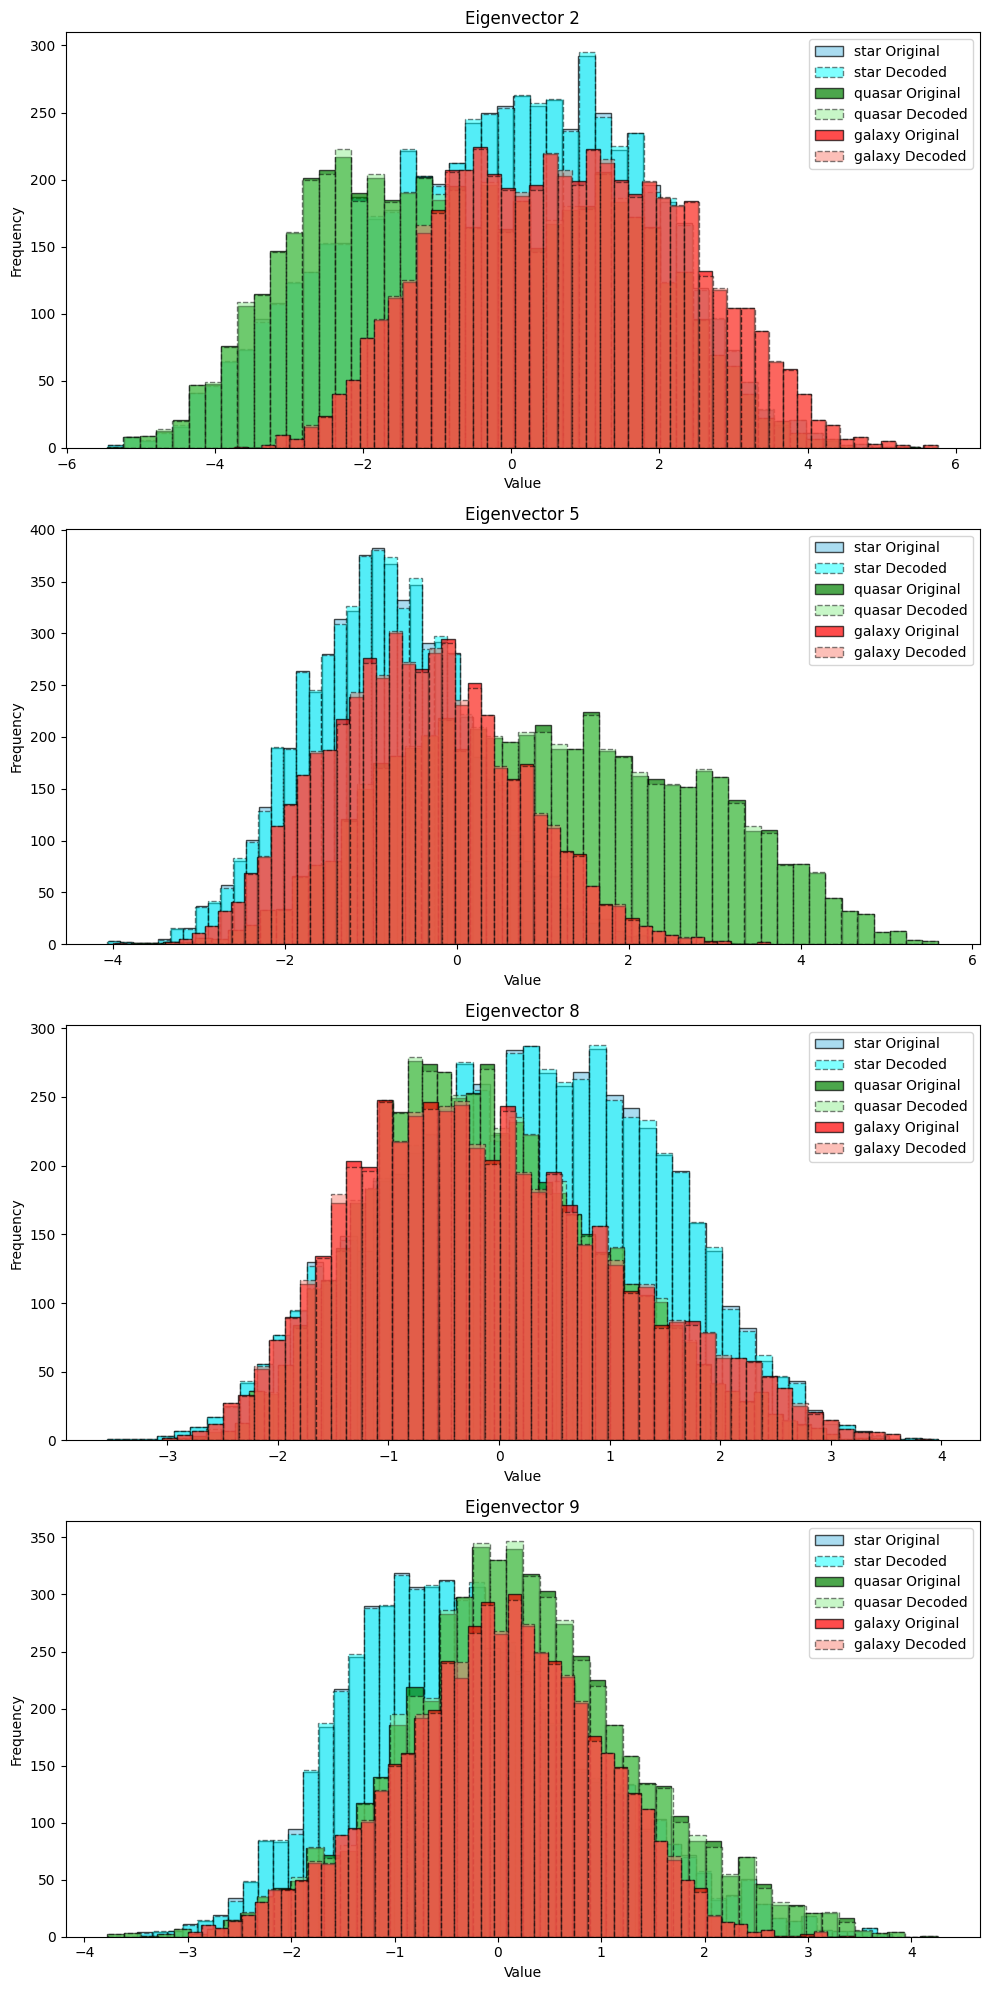

In [58]:
# Plot for selected eigenvectors with potentially good class separation
well_separated_eigenvectors = [1, 4, 7, 8]  # considering 0-indexing, these correspond to eigenvectors 2, 5, 8, and 9
fig, axes = plt.subplots(len(well_separated_eigenvectors), 1, figsize=(10, 5 * len(well_separated_eigenvectors)))

# Loop over each selected eigenvector
for idx, eigenvector_index in enumerate(well_separated_eigenvectors):
    for j, class_name in enumerate(class_names):
        # Extract original and decoded data for current eigenvector and class
        original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
        decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]

        # Plot original data
        axes[idx].hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
        
        # Plot decoded data
        axes[idx].hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

    # Set title and labels, and add a legend for each eigenvector
    axes[idx].set_title(f'Eigenvector {eigenvector_index+1}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

# Show the plot for selected eigenvectors
plt.tight_layout()
plt.show()

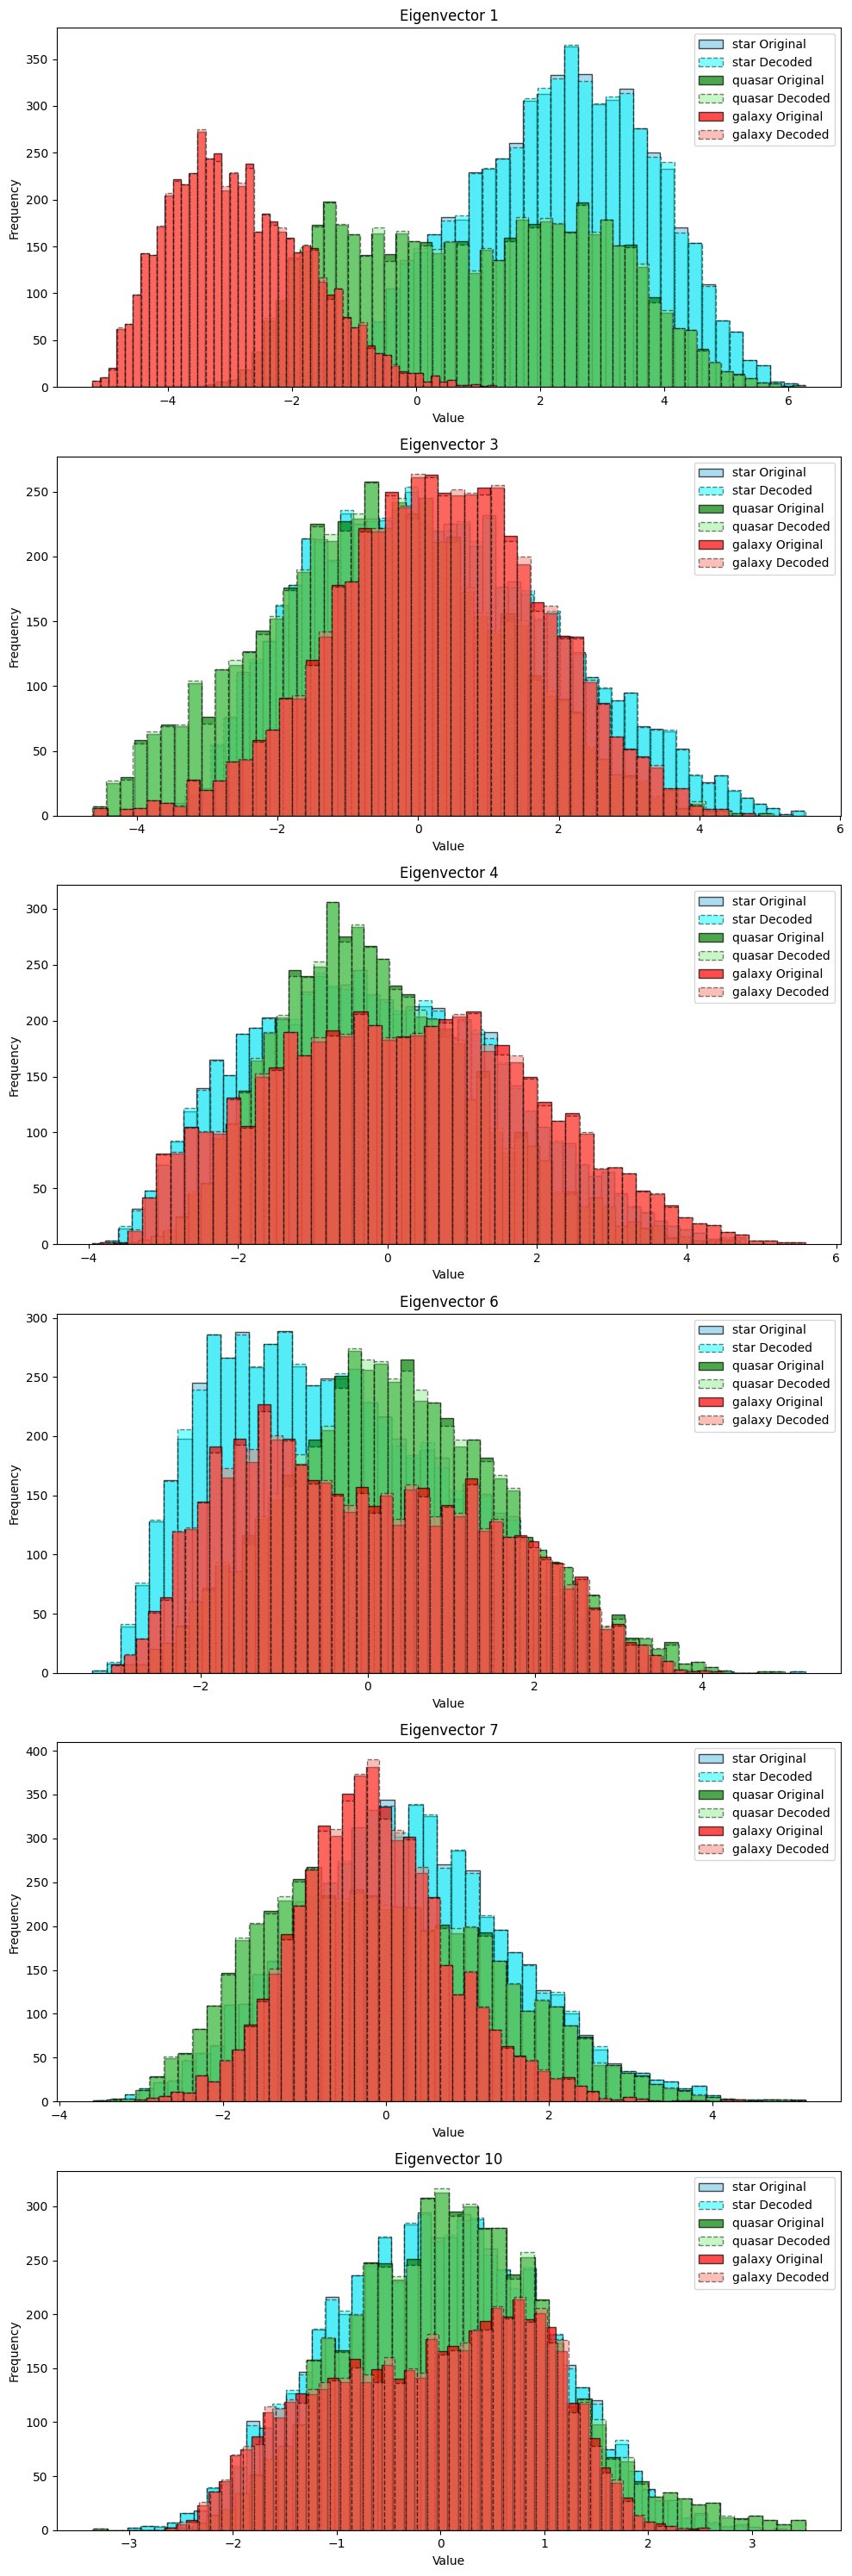

In [59]:
# Plot for the remaining eigenvectors with less class separation
other_eigenvectors = [i for i in range(10) if i not in well_separated_eigenvectors]
fig, axes = plt.subplots(len(other_eigenvectors), 1, figsize=(10, 5 * len(other_eigenvectors)))

for idx, eigenvector_index in enumerate(other_eigenvectors):
    for j, class_name in enumerate(class_names):
        original_data_j = all_data_reduced[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]
        decoded_data_j = decoded_data_pca[:, eigenvector_index][original_data_lengths[j]*j:original_data_lengths[j]*(j+1)]

        axes[idx].hist(original_data_j, bins=50, color=colors_original[j], edgecolor='black', alpha=0.7, label=f'{class_name} Original')
        axes[idx].hist(decoded_data_j, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')

    axes[idx].set_title(f'Eigenvector {eigenvector_index+1}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

We have explored the reconstruction quality of the autoencoder using PCA-reduced data across different principal components. This approach provided insight into the distinctiveness and overlap of classes within a reduced feature space, which is valuable for understanding the potential performance of classification models trained on this data.

## III. DELVE Experiment <a class="anchor" id="four"></a>

### We Now Begin Exploring the DELVE Data:

### Importing Modules

It is widely recommended to include the import statements for all the necessary modules at the beginning of a Jupyter Notebook or any Python program. 
This practice ensures that the required dependencies are properly imported and accessible at the required points in the code, thus avoiding any potential issues or errors related to missing modules or dependencies.

In [2]:
# Importing all required modules

# System modules allow Python programs to interact with the operating system and perform tasks 
# such as reading and writing files, managing processes, and accessing environment variables 
import os
import sys
import importlib
import pickle
import argparse
import itertools
import csv
from tqdm import tqdm
import time

# Data manipulation modules allow users to perform various operations on data,
# such as cleaning, transforming, aggregating, filtering, and visualizing data
import math
import numpy as np
import pandas as pd

# Visualization modules allow users to create visual representations of data
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
# pd.set_option('display.max_columns', 1000)

# Embedding Images within the framework
from IPython.display import HTML
import base64
def get_image_base64(path):
    with open(path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

image_path1 = '../Data/neural_network.png'
image_base64_1 = get_image_base64(image_path1)

image_path2 =  '../Data/autoencoder.png'
image_base64_2 = get_image_base64(image_path2)

# Scikit-learn provides a range of supervised and unsupervised learning algorithms,
# as well as tools for model selection and data preprocessing
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, normalized_mutual_info_score, adjusted_rand_score

# Scipy is a Python library for scientific computing and technical computing
from scipy import stats
from scipy.optimize import linear_sum_assignment as linear_assignment

# Astropy is a Python library for astronomy and astrophysics
from astropy.io import fits
from astropy.table import Table

# TensorFlow is an open-source machine learning library that provides an extensive set of tools and libraries
# for building,training, and deploying neural networks, as well as other machine learning algorithms
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, regularizers, callbacks

# PyTorch is an open-source machine learning library for Python that provides a range of tools
# and functions for building and training neural networks and other machine learning models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,TensorDataset
from torch.autograd import Variable

print(sys.version)

3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:35:41) 
[Clang 16.0.6 ]


## IIIa. Data Acquisition <a class="anchor" id="five"></a>

Data acquisition involves the collection and aggregation of data from diverse sources. This crucial initial stage in the data analysis pipeline entails recognizing data sources and acquiring the data in a format suitable for further analysis.

The provided statement establishes the data pathway. If an alternative data source is required, the line in the subsequent cell should be substituted accordingly.

In [27]:
# Defining a variable named 'data_dir' and assigning it the string value /Users/ash/Research/Data/AGN_DataChallenge/ 
# This is the path to the directory where the dataset is stored on the local machine
data_dir = '/Users/ash/Research/Data/DELVE/'

# Using the display() function to display the value of the 'data_dir' variable in the output of the Jupyter Notebook
display(data_dir)

'/Users/ash/Research/Data/DELVE/'

Reading in the data file. We use Astropy's Table to read in data files because it provides a powerful and flexible way to manipulate and work with tabular data, such as data stored in CSV, FITS, or other formats.

In [28]:
from astropy.table import Table

# Reading a data file stored in the FITS format using the Table.read() method 
# The path to the data file is constructed using the os.path.join() method to join the data_dir variable, 
# which specifies the directory containing the data file, and the filename 'fullcat15_30.fits'
data = Table.read(os.path.join(data_dir, 'fullcat0_15.fits'))

# Converting the FITS formatted data to a Pandas DataFrame using the to_pandas() method
# of the Table object for easier pandas manipulation
fcDF0_15 = data.to_pandas()

#### Data types

The measurements can be classified into several key categories:
- __Astrometry__ includes measurements of celestial coordinates such as right ascension (RA), declination (Dec), proper motion, and parallax.
- __Photometry__ encompasses both point and extended source photometry, providing measurements in terms of AB magnitudes and fluxes (expressed in nJy).
- __Color__ is determined by computing the ratios of fluxes in different wavelength bands.
- __Morphology__ is indicated by a binary value, with 1 representing extended sources and 0 representing point-like sources.
- __Light Curve Features__ are extracted from the SDSS light curves when a match is found.
- __Redshift__ is provided whenever available, including both spectroscopic and photometric measurements.

Inspecting the attributes

In [29]:
# Define a function to format floating-point numbers
def format_float(value):
    return f"{value:.3f}"

# Set display options
pd.set_option('display.float_format', format_float)

# Mags and errors
mags_and_errors = fcDF0_15.iloc[:, [2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,20,21,22,23]].copy()
display(mags_and_errors.describe())

# Morphology
morphology = fcDF0_15.iloc[:, 24:28].copy()
display(morphology.describe())

# Astrometric
astrometric_columns = list(range(29, 35)) + [39, 40]
astrometric = fcDF0_15.iloc[:, astrometric_columns].copy()
display(astrometric.describe())

display(fcDF0_15.shape)

mag_auto_g  magerr_auto_g  mag_auto_i  magerr_auto_i  mag_auto_r  \
count 7160589.000    7160589.000 7160589.000    7160589.000 7160589.000   
mean       35.686         17.757      22.509          2.546      26.560   
std        29.562         37.871      12.375         15.484      19.822   
min        13.279          0.000      12.396          0.000      12.446   
25%        21.407          0.038      19.781          0.019      20.371   
50%        22.697          0.107      20.833          0.045      21.544   
75%        24.000          0.248      21.675          0.088      22.649   
max        99.000         99.000      99.000         99.000      99.000   

       magerr_auto_r  mag_auto_z  magerr_auto_z   ypetromag  ypetromagerr  \
count    7160589.000 7160589.000    7160589.000 1069093.000   1069093.000   
mean           6.918      21.899          2.269      18.808         0.189   
std           25.106      11.707         14.574       1.520         2.380   
min            0.000      11.839          0.000      10.152         0.000   
25%            0.020      19.457          0.026      18.104         0.085   
50%            0.052      20.476          0.061      19.138         0.180   
75%            0.126      21.236          0.110      19.877         0.258   
max           99.000      99.000         99.000      29.918      2449.174   

        jpetromag  jpetromagerr   hpetromag  hpetromagerr  kspetromag  \
count 6567709.000   6567709.000 2175831.000   2175831.000 5619938.000   
mean       18.641         0.197      17.783         0.222      17.163   
std         1.509         1.883       1.438         0.629       1.270   
min         9.756         0.000       9.010         0.000       7.765   
25%        17.933         0.083      17.121         0.101      16.565   
50%        18.949         0.183      18.084         0.208      17.420   
75%        19.696         0.269      18.781         0.302      18.038   
max        29.526      3599.787      27.896       625.568      27.164   

           w1mpro   w1sigmpro      w2mpro   w2sigmpro  
count 7160589.000 7160557.000 7160589.000 6776913.000  
mean       16.773       0.057      16.597       0.136  
std         1.060       0.037       1.052       0.103  
min         5.372       0.009       5.021       0.007  
25%        16.266       0.031      16.063       0.063  
50%        16.902       0.047      16.704       0.107  
75%        17.483       0.073      17.333       0.180  
max        19.882       0.524      18.757       0.543

extended_class_g  extended_class_r  extended_class_i  extended_class_z
count       7160589.000       7160589.000       7160589.000       7160589.000
mean              0.101             1.425             1.953             1.980
std               4.383             3.079             2.144             2.054
min              -9.000            -9.000            -9.000            -9.000
25%               0.000             0.000             1.000             2.000
50%               2.000             3.000             3.000             3.000
75%               3.000             3.000             3.000             3.000
max               3.000             3.000             3.000             3.000

pm       pmdec  pmdec_error        pmra  pmra_error  \
count 1227089.000 1227089.000  1227089.000 1227089.000 1227089.000   
mean       15.785      -6.753        0.371       7.966       0.374   
std        17.272      13.129        0.419      16.311       0.431   
min         0.001   -1021.905        0.009    -463.206       0.006   
25%         6.602     -10.263        0.090       0.187       0.089   
50%        11.518      -4.721        0.224       5.524       0.221   
75%        19.325      -0.680        0.493      12.924       0.486   
max      1239.746     291.752        3.356    1226.014       3.370   

       radial_velocity                   ra                dec  
count        42817.000          7160589.000        7160589.000  
mean             7.539 9906612873149606.000 10918910174489.570  
std             39.338      72875233220.797   198687555683.023  
min           -423.485 9906601419079680.000 10582400001448.000  
25%            -11.124 9906604302803806.000 10697700065729.000  
50%              6.577 9906607362678136.000 11005200040832.000  
75%             24.664 9906618409159124.000 11098800432733.000  
max            489.907 9908820726915852.000 11181000387142.000

(7160589, 41)

#### Data Munging

In [30]:
# Cleaning the data
fcDF0_15 = fcDF0_15.drop(columns=['classprob_dsc_combmod_galaxy', 'classprob_dsc_combmod_quasar', 'classprob_dsc_combmod_star'])

## IIIb. Data Processing <a class="anchor" id="six"></a>

Data processing involves converting unprocessed data into a format that is appropriate for analysis. This encompasses several stages, such as data cleansing, data integration, data transformation, data reduction, and data visualization, with the objective of making the data more usable and insightful.

Our first step is to understand the basic structure of our data. This involves examining the dimensions, column names, and some statistical properties of our dataset. These insights will guide us in deciding which features are crucial for our analysis and which preprocessing steps are necessary.

In [33]:
# Define the list of attributes we are interested in
# Exclude Object IDs, Errors, Ra & Dec

DF_list = [
    # Magnitudes in g, i, r, and z bands from AUTO photometry
    'mag_auto_g', 'mag_auto_i', 'mag_auto_r', 'mag_auto_z',
    # Magnitudes in Y, J, H, and Ks bands from Petrosian photometry
    'ypetromag', 'jpetromag', 'hpetromag', 'kspetromag',
    # Magnitudes in WISE 1 and WISE 2 bands
    'w1mpro', 'w2mpro',
    # Extended class in g, r, i, and z bands
    'extended_class_g', 'extended_class_r', 'extended_class_i', 'extended_class_z',
    # Total proper motion, proper motion in declination, and proper motion in right ascension
    'pm', 'pmdec', 'pmra',
    # Radial velocity of the objects
    'radial_velocity',
]

# Create a subset of the original DataFrame using the defined list of attributes
subset_df = fcDF0_15[DF_list].copy()

# Now display the information for this subsetted DataFrame
display(subset_df.shape)
display(subset_df.columns)
display(subset_df.describe())

(7160589, 18)

Index(['mag_auto_g', 'mag_auto_i', 'mag_auto_r', 'mag_auto_z', 'ypetromag',
       'jpetromag', 'hpetromag', 'kspetromag', 'w1mpro', 'w2mpro',
       'extended_class_g', 'extended_class_r', 'extended_class_i',
       'extended_class_z', 'pm', 'pmdec', 'pmra', 'radial_velocity'],
      dtype='object')

mag_auto_g  mag_auto_i  mag_auto_r  mag_auto_z   ypetromag   jpetromag  \
count 7160589.000 7160589.000 7160589.000 7160589.000 1069093.000 6567709.000   
mean       35.686      22.509      26.560      21.899      18.808      18.641   
std        29.562      12.375      19.822      11.707       1.520       1.509   
min        13.279      12.396      12.446      11.839      10.152       9.756   
25%        21.407      19.781      20.371      19.457      18.104      17.933   
50%        22.697      20.833      21.544      20.476      19.138      18.949   
75%        24.000      21.675      22.649      21.236      19.877      19.696   
max        99.000      99.000      99.000      99.000      29.918      29.526   

        hpetromag  kspetromag      w1mpro      w2mpro  extended_class_g  \
count 2175831.000 5619938.000 7160589.000 7160589.000       7160589.000   
mean       17.783      17.163      16.773      16.597             0.101   
std         1.438       1.270       1.060       1.052             4.383   
min         9.010       7.765       5.372       5.021            -9.000   
25%        17.121      16.565      16.266      16.063             0.000   
50%        18.084      17.420      16.902      16.704             2.000   
75%        18.781      18.038      17.483      17.333             3.000   
max        27.896      27.164      19.882      18.757             3.000   

       extended_class_r  extended_class_i  extended_class_z          pm  \
count       7160589.000       7160589.000       7160589.000 1227089.000   
mean              1.425             1.953             1.980      15.785   
std               3.079             2.144             2.054      17.272   
min              -9.000            -9.000            -9.000       0.001   
25%               0.000             1.000             2.000       6.602   
50%               3.000             3.000             3.000      11.518   
75%               3.000             3.000             3.000      19.325   
max               3.000             3.000             3.000    1239.746   

            pmdec        pmra  radial_velocity  
count 1227089.000 1227089.000        42817.000  
mean       -6.753       7.966            7.539  
std        13.129      16.311           39.338  
min     -1021.905    -463.206         -423.485  
25%       -10.263       0.187          -11.124  
50%        -4.721       5.524            6.577  
75%        -0.680      12.924           24.664  
max       291.752    1226.014          489.907

In [34]:
# To handle missing values, we are dropping rows with any missing values
subset_df_new = subset_df.dropna()

# Check and handle infinite values
infinite_mask = np.isinf(subset_df_new)
subset_df_new[infinite_mask] = np.nan
subset_df_new.dropna(inplace=True)

# Normalize the data
scaler = StandardScaler()
subset_df_scaled = scaler.fit_transform(subset_df_new)

# Optionally, you can split the dataset into training and testing sets if you plan to perform some form of validation
# For unsupervised learning, this is not always necessary, but it can be useful for evaluating clustering or dimensionality reduction
X_train, X_test = train_test_split(subset_df_scaled, test_size=0.2, random_state=42)

# Display the shapes of the processed data
print("Shape of the cleaned and scaled full data:", subset_df_scaled.shape)
print("Shape of the training data:", X_train.shape)
print("Shape of the test data:", X_test.shape)

Shape of the cleaned and scaled full data: (3941, 18)
Shape of the training data: (3152, 18)
Shape of the test data: (789, 18)


/var/folders/_c/47qwt9c16kx2rbmn6k_fsyc40000gn/T/ipykernel_24282/2004703693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_new[infinite_mask] = np.nan
/var/folders/_c/47qwt9c16kx2rbmn6k_fsyc40000gn/T/ipykernel_24282/2004703693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df_new[infinite_mask] = np.nan
/var/folders/_c/47qwt9c16kx2rbmn6k_fsyc40000gn/T/ipykernel_24282/2004703693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

## IV. Autoencoder Experiments <a class="anchor" id="seven"></a>

## IVa. Model Definition <a class="anchor" id="eight"></a>

In [35]:
# TensorFlow Implementation

# TensorFlow, paired with Keras, is like a recipe that you plan out in advance. 
# You list all the ingredients (layers of the network) and the steps (operations like activations)
# before you start cooking (running the network). You don't deviate from the recipe once you start. 
# In our case, the recipe consists of an encoder (which reduces the data down to a smaller, dense representation) 
# and a decoder (which tries to reconstruct the original data from this dense representation).

# Here we are setting up the architecture of the simple autoencoder. This setup is static and is defined
# before the training starts. We are using the functional API which allows for direct manipulation of the data flow.

# Define the simple autoencoder function
def Autoencoder_Simple(input_size):
    # Calculate the hidden layer size (half of the input size) 
    #Ash: Defining network dimensions based on input.
    hidden_size = int(input_size / 2.0)
    # Calculate the bottleneck layer size (half of the hidden layer size) 
    # Further reducing dimension for the bottleneck.
    bottleneck_size = int(hidden_size / 2.0)
    
    # Same as PyTorch, setting the hidden layer size to half of the input and the bottleneck size to half of the hidden layer.
    
    # Define the input layer with the specified input size
    input_tab = Input(shape=(input_size,))
    # Define the encoder layers with 'relu' activation function 
    # Structuring the encoder part.
    hidden_1 = layers.Dense(hidden_size, activation='relu')(input_tab)
    bottleneck = layers.Dense(bottleneck_size, activation='relu')(hidden_1)
    # Define the decoder layers 
    # Structuring the decoder part to reconstruct the input.
    hidden_2 = layers.Dense(hidden_size, activation='relu')(bottleneck)
    output_tab = layers.Dense(input_size, activation='linear')(hidden_2)
    
    # Create the encoder model, which includes the input layer and bottleneck layer
    # Defining the encoder model.
    encoder = Model(input_tab, bottleneck) 
    # Create the full autoencoder model, which includes the input and output layers
    # Defining the full autoencoder model.
    autoencoder = Model(input_tab, output_tab) 
    
    # Return both the full autoencoder model and the encoder model
    # Returning both models for potential separate use.
    return autoencoder, encoder 

    # There is no need for a 'forward' function in TensorFlow as the model's flow is predefined.
    # the model's flow of data is static and predefined, which means a forward function is not necessary. 
    # The model already knows the path the data will take. In PyTorch, the model's flow of data is dynamically defined
    # during runtime, hence a forward function is required to describe this flow each time data is passed through the model.

## IVb. Model Visualization <a class="anchor" id="nine"></a>

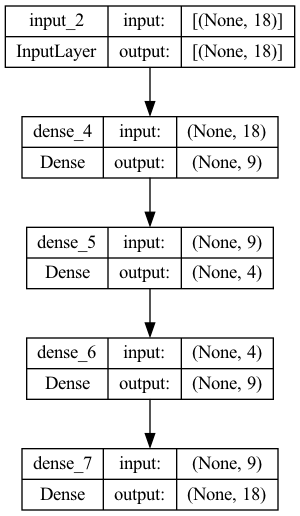

In [37]:
# TensorFlow Implementation

# TensorFlow operates with a static computational graph, which means that the structure of the neural network
# model is defined and fixed before any data is processed. It's akin to setting up a blueprint from which 
# TensorFlow will work every time the model runs. The plot_model utility in TensorFlow provides a visual 
# representation of this predefined model. It illustrates the architecture of the network, including the layers
# and how they are connected. Because the graph is static, the visualization remains the same unless you redefine
# and rebuild the model structure.

# In TensorFlow, the Autoencoder_Simple function is called with the input_size argument, 
# which returns two Keras Model objects: the full autoencoder (decoder) and the encoder. 
# The structure of the model is then visualized using the plot_model function from tensorflow.keras.utils, 
# which generates a diagram of the model architecture and saves it as an image file.
model_path = '../data/tensorflowmodel.png'

input_size = X_train.shape[1]
decoder, encoder = Autoencoder_Simple(input_size)
# Save the model diagram
plot_model(decoder, show_shapes=True, to_file=model_path)

## IVc. Model Training <a class="anchor" id="ten"></a>

In [40]:
# TensorFlow Implementation

# Define the function to train the model
def train_model_with_val_size(subset_df_scaled, val_size, n_epochs=15):
    X_train_new, X_val = train_test_split(subset_df_scaled, test_size=val_size, random_state=42)
    model, _ = Autoencoder_Simple(subset_df_scaled.shape[1])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    history = model.fit(X_train_new, X_train_new, epochs=n_epochs, batch_size=32, validation_data=(X_val, X_val))
    return history.history['loss'], history.history['val_loss']

# Function to calculate the number of data points for a given fraction
def calc_data_points(fraction, total_data_points):
    return int(fraction * total_data_points)

In [41]:
# TensorFlow Training Loop

validation_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Different colors for each validation size
losses_dict_tf = {}

for i, val_size in enumerate(validation_sizes):
    print(f"Training with validation size: {val_size}")
    train_losses, val_losses = train_model_with_val_size(subset_df_scaled, val_size)
    losses_dict_tf[val_size] = {'train_losses': train_losses, 'val_losses': val_losses}

Training with validation size: 0.05
Epoch 1/15


2023-12-29 19:15:58.121890: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-29 19:15:58.560956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - ETA: 0s - loss: 0.9840

2023-12-29 19:16:02.373859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 5s 17ms/step - loss: 0.9840 - val_loss: 1.1127
Epoch 2/15
117/117 [==============================] - 1s 6ms/step - loss: 0.8633 - val_loss: 0.9133
Epoch 3/15
117/117 [==============================] - 1s 6ms/step - loss: 0.6889 - val_loss: 0.7685
Epoch 4/15
117/117 [==============================] - 1s 7ms/step - loss: 0.5750 - val_loss: 0.6603
Epoch 5/15
117/117 [==============================] - 1s 6ms/step - loss: 0.5047 - val_loss: 0.5997
Epoch 6/15
117/117 [==============================] - 1s 7ms/step - loss: 0.4630 - val_loss: 0.5653
Epoch 7/15
117/117 [==============================] - 1s 7ms/step - loss: 0.4298 - val_loss: 0.5299
Epoch 8/15
117/117 [==============================] - 1s 7ms/step - loss: 0.3987 - val_loss: 0.4988
Epoch 9/15
117/117 [==============================] - 1s 7ms/step - loss: 0.3745 - val_loss: 0.4784
Epoch 10/15
117/117 [==============================] - 1s 7ms/step - loss: 0.3555 - val_loss: 0.4586
Epoch 11/

2023-12-29 19:16:13.888129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - ETA: 0s - loss: 1.0029

2023-12-29 19:16:14.890092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


111/111 [==============================] - 1s 11ms/step - loss: 1.0029 - val_loss: 0.9021
Epoch 2/15
111/111 [==============================] - 1s 7ms/step - loss: 0.8117 - val_loss: 0.7483
Epoch 3/15
111/111 [==============================] - 1s 7ms/step - loss: 0.6787 - val_loss: 0.6277
Epoch 4/15
111/111 [==============================] - 1s 7ms/step - loss: 0.5773 - val_loss: 0.5363
Epoch 5/15
111/111 [==============================] - 1s 7ms/step - loss: 0.4933 - val_loss: 0.4763
Epoch 6/15
111/111 [==============================] - 1s 7ms/step - loss: 0.4378 - val_loss: 0.4349
Epoch 7/15
111/111 [==============================] - 1s 6ms/step - loss: 0.3987 - val_loss: 0.4027
Epoch 8/15
111/111 [==============================] - 1s 7ms/step - loss: 0.3644 - val_loss: 0.3757
Epoch 9/15
111/111 [==============================] - 1s 7ms/step - loss: 0.3371 - val_loss: 0.3552
Epoch 10/15
111/111 [==============================] - 1s 7ms/step - loss: 0.3179 - val_loss: 0.3389
Epoch 11/

2023-12-29 19:16:27.319450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 3s 10ms/step - loss: 1.1143 - val_loss: 0.9155
Epoch 2/15
 1/99 [..............................] - ETA: 0s - loss: 0.8872

2023-12-29 19:16:28.286705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


99/99 [==============================] - 1s 8ms/step - loss: 0.9975 - val_loss: 0.8215
Epoch 3/15
99/99 [==============================] - 1s 8ms/step - loss: 0.7984 - val_loss: 0.5748
Epoch 4/15
99/99 [==============================] - 1s 8ms/step - loss: 0.5972 - val_loss: 0.4505
Epoch 5/15
99/99 [==============================] - 1s 7ms/step - loss: 0.5093 - val_loss: 0.4037
Epoch 6/15
99/99 [==============================] - 1s 8ms/step - loss: 0.4618 - val_loss: 0.3658
Epoch 7/15
99/99 [==============================] - 1s 8ms/step - loss: 0.4226 - val_loss: 0.3372
Epoch 8/15
99/99 [==============================] - 1s 8ms/step - loss: 0.3991 - val_loss: 0.3179
Epoch 9/15
99/99 [==============================] - 1s 8ms/step - loss: 0.3840 - val_loss: 0.3040
Epoch 10/15
99/99 [==============================] - 1s 7ms/step - loss: 0.3730 - val_loss: 0.2895
Epoch 11/15
99/99 [==============================] - 1s 7ms/step - loss: 0.3632 - val_loss: 0.2758
Epoch 12/15
99/99 [==========

2023-12-29 19:16:39.073181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


87/87 [==============================] - 1s 14ms/step - loss: 0.9461 - val_loss: 0.8311
Epoch 2/15
 1/87 [..............................] - ETA: 0s - loss: 0.5581

2023-12-29 19:16:40.180498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


87/87 [==============================] - 1s 8ms/step - loss: 0.7945 - val_loss: 0.7425
Epoch 3/15
87/87 [==============================] - 1s 8ms/step - loss: 0.7375 - val_loss: 0.6994
Epoch 4/15
87/87 [==============================] - 1s 8ms/step - loss: 0.6856 - val_loss: 0.6473
Epoch 5/15
87/87 [==============================] - 1s 8ms/step - loss: 0.6219 - val_loss: 0.5790
Epoch 6/15
87/87 [==============================] - 1s 8ms/step - loss: 0.5476 - val_loss: 0.5200
Epoch 7/15
87/87 [==============================] - 1s 8ms/step - loss: 0.4918 - val_loss: 0.4796
Epoch 8/15
87/87 [==============================] - 1s 8ms/step - loss: 0.4509 - val_loss: 0.4530
Epoch 9/15
87/87 [==============================] - 1s 8ms/step - loss: 0.4189 - val_loss: 0.4337
Epoch 10/15
87/87 [==============================] - 1s 7ms/step - loss: 0.3921 - val_loss: 0.4090
Epoch 11/15
87/87 [==============================] - 1s 8ms/step - loss: 0.3575 - val_loss: 0.3761
Epoch 12/15
87/87 [==========

2023-12-29 19:16:50.071441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - ETA: 0s - loss: 0.9504

2023-12-29 19:16:50.838056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 1s 14ms/step - loss: 0.9504 - val_loss: 0.9011
Epoch 2/15
74/74 [==============================] - 1s 8ms/step - loss: 0.7926 - val_loss: 0.7627
Epoch 3/15
74/74 [==============================] - 1s 9ms/step - loss: 0.6606 - val_loss: 0.6695
Epoch 4/15
74/74 [==============================] - 1s 8ms/step - loss: 0.5828 - val_loss: 0.6249
Epoch 5/15
74/74 [==============================] - 1s 9ms/step - loss: 0.5392 - val_loss: 0.5896
Epoch 6/15
74/74 [==============================] - 1s 9ms/step - loss: 0.5026 - val_loss: 0.5570
Epoch 7/15
74/74 [==============================] - 1s 9ms/step - loss: 0.4708 - val_loss: 0.5297
Epoch 8/15
74/74 [==============================] - 1s 9ms/step - loss: 0.4452 - val_loss: 0.5068
Epoch 9/15
74/74 [==============================] - 1s 10ms/step - loss: 0.4239 - val_loss: 0.4875
Epoch 10/15
74/74 [==============================] - 1s 9ms/step - loss: 0.4077 - val_loss: 0.4733
Epoch 11/15
74/74 [=========

2023-12-29 19:17:00.562481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 1.0979

2023-12-29 19:17:01.295359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 1s 16ms/step - loss: 1.0979 - val_loss: 0.9946
Epoch 2/15
68/68 [==============================] - 1s 9ms/step - loss: 0.9317 - val_loss: 0.8796
Epoch 3/15
68/68 [==============================] - 1s 9ms/step - loss: 0.8108 - val_loss: 0.7670
Epoch 4/15
68/68 [==============================] - 1s 9ms/step - loss: 0.7146 - val_loss: 0.6952
Epoch 5/15
68/68 [==============================] - 1s 9ms/step - loss: 0.6515 - val_loss: 0.6381
Epoch 6/15
68/68 [==============================] - 1s 9ms/step - loss: 0.5924 - val_loss: 0.5837
Epoch 7/15
68/68 [==============================] - 1s 9ms/step - loss: 0.5378 - val_loss: 0.5412
Epoch 8/15
68/68 [==============================] - 1s 9ms/step - loss: 0.4974 - val_loss: 0.5120
Epoch 9/15
68/68 [==============================] - 1s 9ms/step - loss: 0.4674 - val_loss: 0.4890
Epoch 10/15
68/68 [==============================] - 1s 9ms/step - loss: 0.4437 - val_loss: 0.4716
Epoch 11/15
68/68 [==========

## IVd. Model Output <a class="anchor" id="eleven"></a>

In [44]:
# TensorFlow Implementation

plt.figure(figsize=(12, 6))
ax1 = plt.gca()  # Get current axis for primary x-axis

# Total number of data points in the dataset
total_data_points = subset_df_scaled.shape[0]

for i, val_size in enumerate(validation_sizes):
    color = colors[i]
    epochs = range(1, len(losses_dict_tf[val_size]['train_losses']) + 1)

    # Plotting on primary x-axis
    ax1.plot(epochs, losses_dict_tf[val_size]['train_losses'], color + '-', label=f'Training loss (val size {val_size})')
    ax1.plot(epochs, losses_dict_tf[val_size]['val_losses'], color + '--', label=f'Validation loss (val size {val_size})')

# Setting primary x-axis labels and limits
ax1.set_xlabel('Fraction of Dataset for Validation')
ax1.set_xticks([i for i, _ in enumerate(validation_sizes)])
ax1.set_xticklabels([f"{int(val_size * 100)}%" for val_size in validation_sizes])
ax1.set_xlim(-0.5, len(validation_sizes) - 0.5)

# Creating secondary x-axis
ax2 = ax1.twiny()
ax2.set_xticks([i for i, val_size in enumerate(validation_sizes)])
ax2.set_xticklabels([str(calc_data_points(val_size, total_data_points)) for val_size in validation_sizes])
ax2.set_xlabel('Number of Data Points for Validation')

plt.title('Training and Validation Loss at 15 Epochs for Different Validation Sizes')
plt.ylabel('Loss')
ax1.legend()
plt.show()

NameError: name 'plt' is not defined

## V. Transfer Learning <a class="anchor" id="twelve"></a>

First, we save our trained encoder model for future use. This is crucial as the encoder compresses the data into a latent space, ideal for further analysis and classification tasks.

In [25]:
# TensorFlow Implementation

# Saving the encoder for further use
encoder.save('encoder.h5')

The next step involves transforming both the training and testing data using our trained encoder. This process converts the data into a lower-dimensional, encoded format, making it suitable for classification models.

In [28]:
# TensorFlow Implementation

# Transform the training and testing data using the trained encoder
X_train_scaled_encoded = encoder.predict(X_train_scaled)
X_test_scaled_encoded = encoder.predict(X_test_scaled)

 123/1660 [=>............................] - ETA: 1s

2023-12-21 13:43:07.986555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


130/417 [========>.....................] - ETA: 0s

2023-12-21 13:43:10.446942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


417/417 [==============================] - 1s 2ms/step


#### Understanding and Visualizing the Latent Space

A crucial aspect of working with autoencoders is gaining an understanding of the latent space – the compressed representation of the data that the encoder part of the model produces. Visualizing and analyzing this latent space can provide deep insights into the characteristics and inherent structure of the data.

Tools for approaching latent space visualization:
Dimensionality Reduction: Techniques like PCA (Principal Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding) can be used to reduce the dimensions of the latent space to two or three, making it possible to visualize the data in a scatter plot.
Scatter Plots: Once the latent space is reduced to a manageable number of dimensions, scatter plots can be used to visualize the data points. Different colors or markers can represent different original classes (like Star, Galaxy, Quasar), or the output of the classification model.

#### Random Forest Classifier on Latent Space Data

We employ a Random Forest Classifier, a robust and versatile machine learning model, to classify the encoded data. This classifier is known for its high accuracy and ability to handle large datasets with multiple features.

In [29]:
# TensorFlow Implementation

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_features='auto', n_jobs=-1)
model_rf.fit(X_train_scaled_encoded, y_train)

# Make a prediction on the test set
y_pred = model_rf.predict(X_test_scaled_encoded)

# Calculate the accuracy of those predictions
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9578204743320324


#### Random Forest Classifier on Original Data

In [35]:
# TensorFlow Implementation

# Random Forest Classifier
model_rf_original = RandomForestClassifier(n_estimators=100, max_features='auto', n_jobs=-1)
model_rf_original.fit(X_train_scaled, y_train)

# Make a prediction on the test set
y_pred_original = model_rf_original.predict(X_test_scaled)

# Calculate the accuracy of those predictions
acc_rf_original = accuracy_score(y_test, y_pred_original)
print(acc_rf_original)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9956469528670069


In [37]:
# Compare the Orginial Data to Latent Space Data

print("Accuracy on Original Data: {:.2f}%".format(acc_rf_original * 100))
print("Accuracy on Latent Space Data: {:.2f}%".format(acc_rf * 100))

Accuracy on Original Data: 99.56%
Accuracy on Latent Space Data: 95.78%


#### Classifying the Entire Dataset

Scale the Full Dataset

Since we have already created a StandardScaler and fitted it to ou training data, we will use this scaler to transform the entire dataset.

In [38]:
# Selecting features from the full dataset
X_full = object_df_new[photometry_columns].drop(['class', 'z'], axis=1)
X_full_scaled = scaler.transform(X_full)  # Scaling the full dataset

 Encode the Full Dataset for Latent Space Analysis
 
If we are using the latent features from the autoencoder, we encode the full dataset with our trained encoder. If we are using the original features, we can skip this step.

In [39]:
# Encoding the full dataset
X_full_scaled_encoded = encoder.predict(X_full_scaled)  

13953/13953 [==============================] - 16s 1ms/step


Classify the Full Dataset

Apply the trained Random Forest model to the entire dataset

In [40]:
# Predicting classes for the full dataset
y_full_pred = model_rf.predict(X_full_scaled_encoded) 